# (7주차) 10월26일
> Pytorch CNN (MNIST 3,7)

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-z7YonYSeq4PyhLt-ab37OJ

`-` (1/2) CNN 모형구축  (MNIST 3,7)

`-` (2/2) 과제설명 

### import 

In [1]:
import torch 
from fastai.vision.all import * 

In [2]:
import graphviz

In [3]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### data 

`-` download data 

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/home/cgb4/.fastai/data/mnist_sample/labels.csv'),Path('/home/cgb4/.fastai/data/mnist_sample/train'),Path('/home/cgb4/.fastai/data/mnist_sample/valid')]

`-` list 

In [6]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

`-` list $\to$ image 

In [7]:
Image.open(threes[4])

`-` image $\to$ tensor 

In [8]:
tensor(Image.open(threes[4]))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  72, 156,
         241, 254, 255, 188,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

- 여기에서 tensor는 파이토치가 아니라 fastai에서 구현한 함수임 

`-` 여러개의 리스트를 모두 텐서로 바꿔보자. 

In [9]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

`-` $X$와 $y$를 만들자. 

In [10]:
seven_tensor.shape, three_tensor.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [11]:
y=torch.tensor([0.0]*6265+ [1.0]*6131).reshape(12396,1)

In [12]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1)

In [13]:
X.shape, y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [16]:
X=X.reshape(12396,1,28,28)

In [17]:
X.shape

torch.Size([12396, 1, 28, 28])

### 지난시간까지의 모형 

#### 2d convolution with windowsize=5

In [18]:
c1=torch.nn.Conv2d(1,16,5) # 입력채널=1 (흑백이므로), 출력채널=16, 윈도우크기5 

In [19]:
X.shape, c1(X).shape

(torch.Size([12396, 1, 28, 28]), torch.Size([12396, 16, 24, 24]))

#### MaxPool2d

In [20]:
m1=torch.nn.MaxPool2d(2)

In [21]:
X.shape,c1(X).shape,m1(c1(X)).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]))

#### ReLU 

In [23]:
a1=torch.nn.ReLU()

In [24]:
X.shape,c1(X).shape, m1(c1(X)).shape, a1(m1(c1(X))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]))

### flatten 

In [25]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(12396,-1)

In [26]:
flatten=Flatten()

In [28]:
X.shape,c1(X).shape, m1(c1(X)).shape, a1(m1(c1(X))).shape, flatten(a1(m1(c1(X)))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 2304]))

#### linear 

In [30]:
l1=torch.nn.Linear(in_features=2304,out_features=1) 

In [37]:
X.shape,\
c1(X).shape, \
m1(c1(X)).shape, \
a1(m1(c1(X))).shape, \
flatten(a1(m1(c1(X)))).shape, \
l1(flatten(a1(m1(c1(X))))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 2304]),
 torch.Size([12396, 1]))

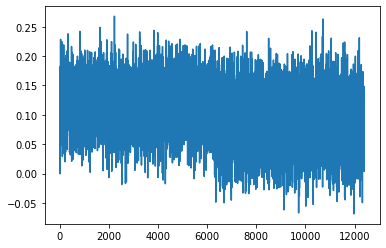

In [38]:
plt.plot(l1(flatten(a1(m1(c1(X))))).data)

#### networks 설계 

In [39]:
net = nn.Sequential(c1,m1,a1,flatten,l1)
## 마지막의 sigmoid는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 

`-` 손실함수와 옵티마이저 정의 

In [40]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

`-` step1~4

In [41]:
for epoc in range(200): 
    ## 1 
    yhat=net(X)
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

In [42]:
a2= torch.nn.Sigmoid()

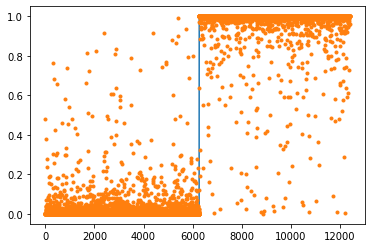

In [48]:
plt.plot(y)
plt.plot(a2(yhat.data),'.')

In [44]:
ypred=a2(yhat.data)>0.5 

In [46]:
sum(ypred==y)/12396

tensor([0.9920])

### 드랍이웃, 배치추가 (fastai + 내가 만든 네트워크) 

#### step1: dls를 만들자. 

In [49]:
ds=torch.utils.data.TensorDataset(X,y)

In [52]:
ds.tensors[0].shape

torch.Size([12396, 1, 28, 28])

In [55]:
ds1,ds2 = torch.utils.data.random_split(ds,[10000,2396]) 

In [57]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=500) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2396) 

In [58]:
dls=DataLoaders(dl1,dl2) 

#### step2: 아키텍처, 손실함수, 옵티마이저 

In [93]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(x.shape[0],-1)

In [94]:
net=torch.nn.Sequential(
    torch.nn.Conv2d(1,16,5), 
    torch.nn.MaxPool2d(2), 
    torch.nn.ReLU(),
    torch.nn.Dropout2d(), 
    Flatten(),
    torch.nn.Linear(2304,1))

In [95]:
loss_fn=torch.nn.BCEWithLogitsLoss()
#optimizer= torch.optim.Adam(net.parameters())

#### step3: lrnr 생성 후 적합

In [96]:
lrnr1 = Learner(dls,net,opt_func=Adam,loss_func=loss_fn) 

In [97]:
lrnr1.fit(10)

epoch,train_loss,valid_loss,time
0,0.496839,0.297676,00:00
1,0.321820,0.108709,00:00
2,0.218450,0.068134,00:00
3,0.161052,0.055339,00:00
4,0.125774,0.048283,00:00
5,0.102232,0.043202,00:00
6,0.085854,0.039505,00:00
7,0.074025,0.036417,00:00
8,0.065452,0.034444,00:00
9,0.059061,0.033016,00:00


#### 각층에 접근

In [108]:
lrnr1.model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

In [132]:
print(X.to("cuda:0").shape,'--> 입력')
print(lrnr1.model[0](X.to("cuda:0")).shape,'--> 2d 컨볼루션')
print(lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))).shape,'--> 맥스풀링') 
print(lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))).shape,'--> 렐루')
print(lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))))).shape,'--> 드랍아웃') 
print(lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))))).shape,'--> 플래튼')
print(lrnr1.model[5](lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))))))).shape,'--> 리니어')

torch.Size([12396, 1, 28, 28]) --> 입력
torch.Size([12396, 16, 24, 24]) --> 2d 컨볼루션
torch.Size([12396, 16, 12, 12]) --> 맥스풀링
torch.Size([12396, 16, 12, 12]) --> 렐루
torch.Size([12396, 16, 12, 12]) --> 드랍아웃
torch.Size([12396, 2304]) --> 플래튼
torch.Size([12396, 1]) --> 리니어


`-` 최종적으로는 아래와 같이 된다. 

In [133]:
lrnr1.model[5](lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))))))

tensor([[-7.6775],
        [-6.6676],
        [ 0.5768],
        ...,
        [13.1107],
        [15.3253],
        [ 8.0247]], device='cuda:0', grad_fn=<AddmmBackward>)

`-` 위의 결과는 아래들과 같다. 

In [135]:
lrnr1.model(X.to("cuda:0"))

tensor([[-7.6775],
        [-6.6676],
        [ 0.5768],
        ...,
        [13.1107],
        [15.3253],
        [ 8.0247]], device='cuda:0', grad_fn=<AddmmBackward>)

In [136]:
net(X.to("cuda:0"))

tensor([[-7.6775],
        [-6.6676],
        [ 0.5768],
        ...,
        [13.1107],
        [15.3253],
        [ 8.0247]], device='cuda:0', grad_fn=<AddmmBackward>)

`-` 결과를 시각화하면 아래와 같다. 

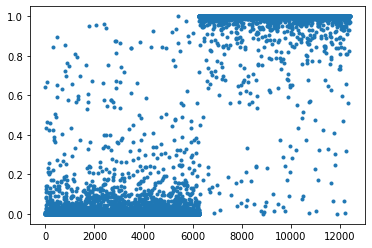

In [137]:
plt.plot(a2(net(X.to("cuda:0")).to("cpu").data),'.')

`-` 빠르고 적합결과도 좋음 

### resent34를 사용 

`-` fastai를 활용

`-` 아까사용한 dls를 수정해야함 $\to$ 네트워크의 형태에 따라서 dls의 형태도 다르게 만들어야함. 
- 내가만든 MLP를 생각해보면 첫 입력이 $784 \to  ???$ 선형층
- 내가만든 CNN은 첫 입력이 $1\times 28 \times 28 \to ???$

`-` dls는 네트워크의 아키텍처를 따라서 다르게 만들어야 함 (당연한 이야기)

`-` resnet34라는 네트워크를 만들기 위해서 새로운 dls를 만들자. 

In [139]:
dls2 = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid_pct=0.2)

In [141]:
lrnr2=cnn_learner(dls2,resnet34)

In [142]:
lrnr2.fit(10)

epoch,train_loss,valid_loss,time
0,0.102295,0.047408,00:09
1,0.044895,0.028195,00:08
2,0.025008,0.020967,00:09
3,0.017816,0.008732,00:08
4,0.016465,0.017797,00:09
5,0.014840,0.020204,00:08
6,0.008250,0.016188,00:08
7,0.011950,0.013376,00:08
8,0.003451,0.013504,00:08
9,0.005553,0.012215,00:08


In [ ]:
`-` lrnr2.model 의 네트워크 정보를 확인